# Student Performance — 02 Exploratory Data Analysis (EDA)

This notebook explores the cleaned Student Performance dataset.
The goal is to understand distributions, relationships, and group differences,
and to identify signals and limitations before modeling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/student-mat-clean.csv")
df.head()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# target distribution
df["g3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: g3, dtype: float64

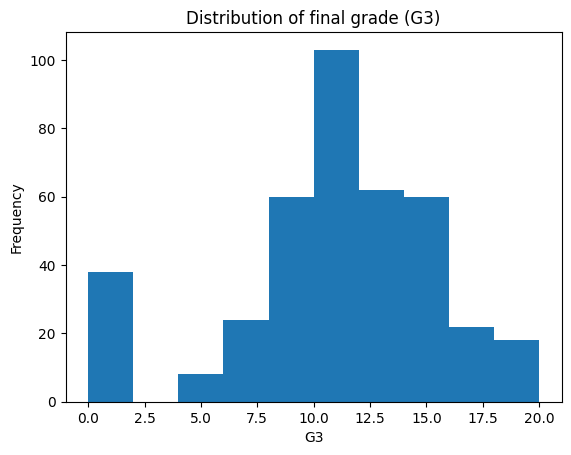

In [4]:
plt.hist(df["g3"], bins=10)
plt.title("Distribution of final grade (G3)")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.show()

## Target distribution

The histogram shows how final grades are distributed in the sample.
This helps identify whether the target is skewed, clustered, or bounded.
Since G3 is limited to a fixed range, extreme predictions should be treated cautiously.


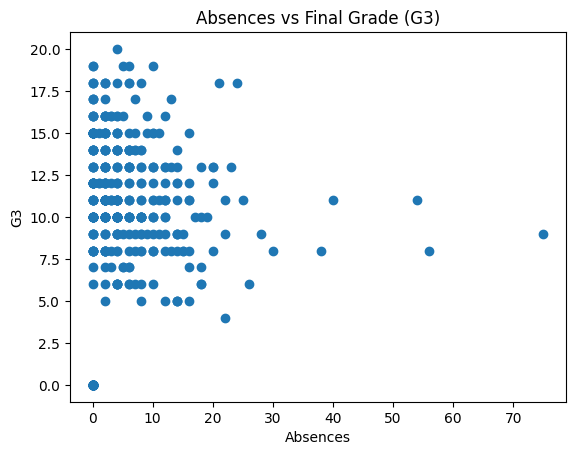

In [5]:
# Absences vs G3
plt.scatter(df["absences"], df["g3"])
plt.title("Absences vs Final Grade (G3)")
plt.xlabel("Absences")
plt.ylabel("G3")
plt.show()

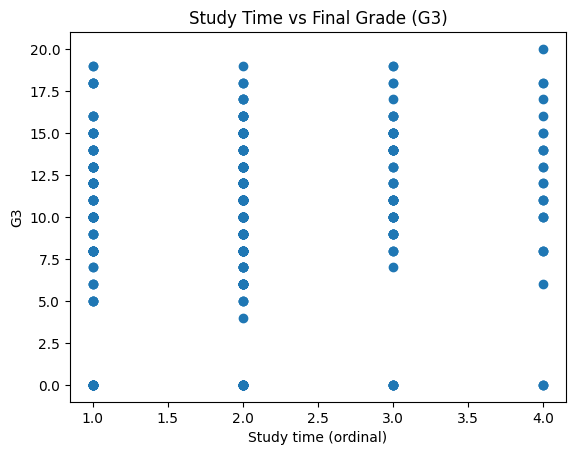

In [6]:
plt.scatter(df["studytime"], df["g3"])
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study time (ordinal)")
plt.ylabel("G3")
plt.show()

## Numeric relationships (initial)

Scatter plots help detect whether relationships appear linear, weak, or noisy.
Absences may show a negative association with G3, but variability is high.
Study time is ordinal and may not behave like a continuous variable.
At this stage, we describe patterns without making causal claims.


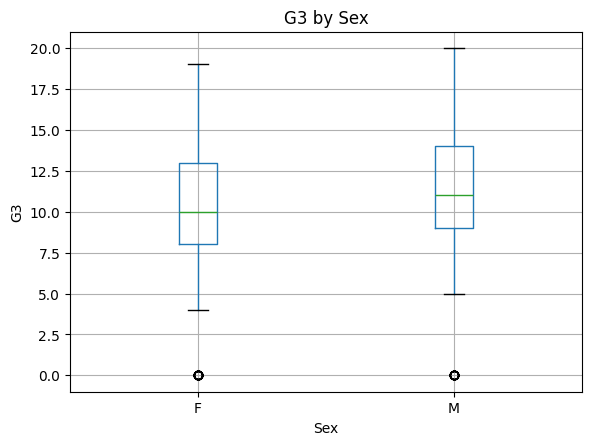

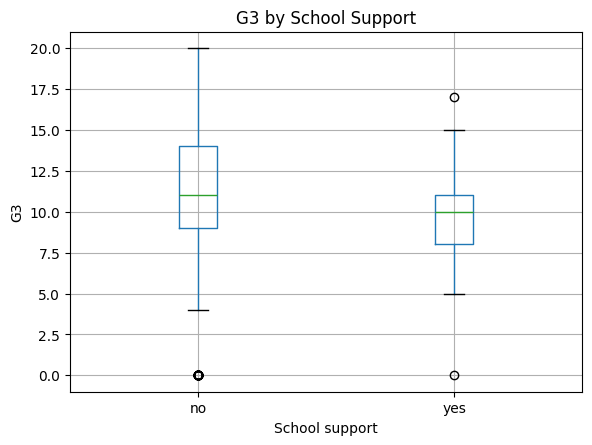

In [7]:
# Categorical comparisons
df.boxplot(column="g3", by="sex")
plt.title("G3 by Sex")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("G3")
plt.show()
df.boxplot(column="g3", by="schoolsup")
plt.title("G3 by School Support")
plt.suptitle("")
plt.xlabel("School support")
plt.ylabel("G3")
plt.show()


## Group comparisons

Boxplots summarize differences in central tendency and spread across groups.
Observed differences may reflect underlying factors, selection effects, or confounding.
These plots are descriptive and do not establish causality.
Small group sizes can make visual differences appear stronger than they are.


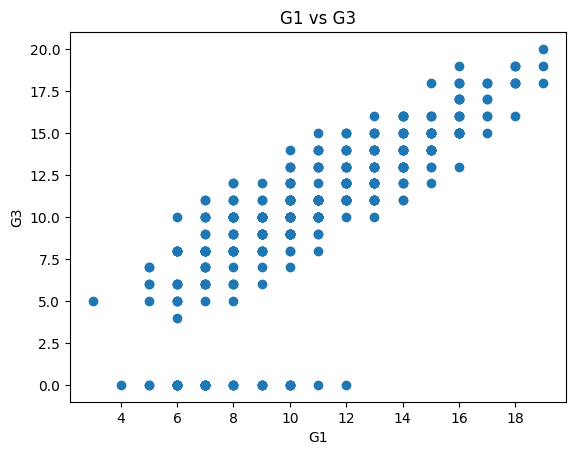

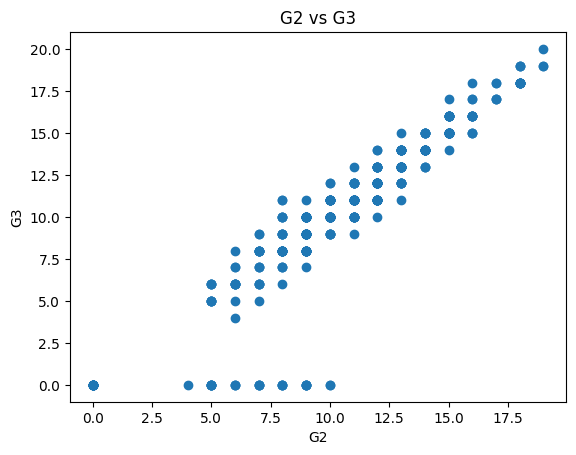

In [8]:
plt.scatter(df["g1"], df["g3"])
plt.title("G1 vs G3")
plt.xlabel("G1")
plt.ylabel("G3")
plt.show()

plt.scatter(df["g2"], df["g3"])
plt.title("G2 vs G3")
plt.xlabel("G2")
plt.ylabel("G3")
plt.show()

## About G1 and G2 (potential leakage)

G1 and G2 are grades from earlier periods and are expected to be strongly associated with G3.
For some use-cases, using G1/G2 to predict G3 is valid (predicting final grade late in the year).
For other use-cases, it may be considered information leakage (predicting early without access to later grades).
In the modeling notebook, we will evaluate models both with and without G1/G2 to reflect these scenarios.


## Hypotheses to test in modeling

Based on this EDA, we will explore:

- A baseline linear model using a small set of numeric predictors
- A model including G1 and G2 (high-signal, late-stage prediction scenario)
- A model excluding G1 and G2 (early-stage prediction scenario)
- Train/test evaluation to assess generalization
